# 1.Contents : 
- 견종모두포함  

# 2. 라이브러리 불러오기

In [59]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import re
import soynlp
sns.set_style('whitegrid', {'grid.linestyle':'--'})
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import datetime as dt
import warnings 
warnings.filterwarnings('ignore') 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [112]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [3]:
pd.options.display.max_columns=None

# 3. 데이터불러오기

In [4]:
path = glob.glob('./*.*')
for i in range(len(path)):
    print(i, path[i])

0 .\0.kosis(노의미).ipynb
1 .\0.soynlp_실습.ipynb
2 .\1.강원도 .ipynb
3 .\1.서울시 반려견 등록 시각화.ipynb
4 .\1.서울시 반려견 등록현황.ipynb
5 .\1.서울시 반려견 등록현황2.ipynb
6 .\2.naver_blog_반려동물(완료).ipynb
7 .\2.naver_개사모(노의미).ipynb
8 .\2.naver_뉴스_반려동물관련(완료).ipynb
9 .\2.naver_뉴스_반려동물여행관련(완료).ipynb
10 .\2.naver_블로그(실패).ipynb
11 .\2.naver_블로그(은지님 코드)(실패).ipynb
12 .\2.naver_블로그_여행관련키워드(완료).ipynb
13 .\2.naver검색 api 서비스(뉴스, 블로그, 쇼핑).ipynb
14 .\2.naver검색 api 서비스(카페).ipynb
15 .\2.naver검색 워드클라우드(뉴스, 블로그)(실패).ipynb
16 .\3.강원도_반려견_카테고리&지도시각화.ipynb
17 .\4.public_api_regani.ipynb
18 .\5.DL_1.feature.ipynb
19 .\5.DL_2.clustering.ipynb
20 .\5.DL_prepresessing1.ipynb
21 .\5.관광지_filtering.ipynb
22 .\6.ML_Clustering_.ipynb
23 .\6.ML_Clustering_v2.ipynb
24 .\6.ML_Clustering_v2_4_4.ipynb
25 .\6.MS_Clu.ipynb
26 .\7.pat_travel_prct.ipynb
27 .\clustering_data.csv
28 .\dog_data.csv
29 .\gu16_total.csv
30 .\only_숙박지데이터_0711.csv
31 .\pre_dog_data_0708.csv
32 .\Raw Data Cleansing - 견종데이터(220708).csv
33 .\reg_pat_total_cnt.csv
34 .\trip_info.htm

In [5]:
path[31] # Raw Data Cleansing - 견종데이터(220708).csv

'.\\pre_dog_data_0708.csv'

In [6]:
raw = pd.read_csv('.\\Raw Data Cleansing - 견종데이터(220708).csv')#, index_col = 0)#, encoding = 'cp949')
df = raw.copy()
df.shape

(7826, 14)

# 4. 데이터 확인

In [7]:
df.head()

,품종,크기(체중에따른),크기(라벨링),나이,산책시간(시간),체중,적정음수량,성별,중성화여부,출생연도,tag1,tag2,색상,Unnamed: 13
0,골든 리트리버,대,2,13,0.5,27.0,1755.0,M,N,2009,수영,산책,갈색,kg당 65ml
1,골든 리트리버,대,2,10,0.5,25.0,1625.0,F,N,2012,수영,산책,갈색,자견 1살 미만
2,골든 리트리버,대,2,9,0.5,40.0,2600.0,M,N,2013,수영,산책,갈색,성견 1살 ~ 7살
3,골든 리트리버,대,2,8,0.5,28.0,1820.0,F,N,2014,수영,산책,갈색,노령견 8살 이상
4,골든 리트리버,대,2,8,0.5,33.0,2145.0,M,N,2014,수영,산책,갈색,NaN


In [8]:
df.tail()

,품종,크기(체중에따른),크기(라벨링),나이,산책시간(시간),체중,적정음수량,성별,중성화여부,출생연도,tag1,tag2,색상,Unnamed: 13
7821,핏불테리어,대,2,2,1.5,25.0,1625.0,F,U,2020,트레킹,NaN,검은색,NaN
7822,화이트테리어,소,0,13,0.5,7.3,474.5,F,Y,2009,수영,산책,흰,NaN
7823,화이트테리어,소,0,5,1.5,5.0,325.0,F,U,2017,산책,NaN,흰색,NaN
7824,휘펫,중,1,2,1.0,14.0,910.0,M,N,2020,트레킹,NaN,베이지,NaN
7825,휘펫,중,1,2,1.0,19.5,1267.5,F,U,2020,트레킹,NaN,검/갈/흰,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7826 entries, 0 to 7825
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   품종           7826 non-null   object 
 1   크기(체중에따른)    7826 non-null   object 
 2   크기(라벨링)      7826 non-null   int64  
 3   나이           7826 non-null   int64  
 4   산책시간(시간)     7826 non-null   float64
 5   체중           7826 non-null   float64
 6   적정음수량        7826 non-null   float64
 7   성별           7826 non-null   object 
 8   중성화여부        7826 non-null   object 
 9   출생연도         7826 non-null   int64  
 10  tag1         1924 non-null   object 
 11  tag2         1526 non-null   object 
 12  색상           7826 non-null   object 
 13  Unnamed: 13  4 non-null      object 
dtypes: float64(3), int64(3), object(8)
memory usage: 856.1+ KB


In [10]:
df['품종'].nunique()

83

In [11]:
df['품종'].value_counts()

믹스견            5738
말티즈             348
푸들              302
포메라니안           167
진도견             148
               ... 
아메리칸 핏불 테리어       1
아프간 하운드           1
제페니즈칭             1
잭 러셀 테리어          1
스코티쉬 테리어          1
Name: 품종, Length: 83, dtype: int64

In [12]:
df['크기(체중에따른)'].value_counts()

소    5503
중    1715
대     608
Name: 크기(체중에따른), dtype: int64

In [13]:
df['크기(라벨링)'].value_counts()

0    5503
1    1715
2     608
Name: 크기(라벨링), dtype: int64

# 5. 데이터 정리(cleansing)

In [14]:
df.head()

,품종,크기(체중에따른),크기(라벨링),나이,산책시간(시간),체중,적정음수량,성별,중성화여부,출생연도,tag1,tag2,색상,Unnamed: 13
0,골든 리트리버,대,2,13,0.5,27.0,1755.0,M,N,2009,수영,산책,갈색,kg당 65ml
1,골든 리트리버,대,2,10,0.5,25.0,1625.0,F,N,2012,수영,산책,갈색,자견 1살 미만
2,골든 리트리버,대,2,9,0.5,40.0,2600.0,M,N,2013,수영,산책,갈색,성견 1살 ~ 7살
3,골든 리트리버,대,2,8,0.5,28.0,1820.0,F,N,2014,수영,산책,갈색,노령견 8살 이상
4,골든 리트리버,대,2,8,0.5,33.0,2145.0,M,N,2014,수영,산책,갈색,NaN


In [15]:
df.columns

Index(['품종', '크기(체중에따른)', '크기(라벨링)', '나이', '산책시간(시간)', '체중', '적정음수량', '성별',
       '중성화여부', '출생연도', 'tag1', 'tag2', '색상', 'Unnamed: 13'],
      dtype='object')

- 데이터 정리  
['품종', '크기(체중에따른)', '크기(라벨링)', '나이', '산책시간(시간)', '체중', '적정음수량']

In [16]:
# 성별, 중성화여부는 제외하자 - 결측치를 다루기엔 데이터가 많음 - 그리고 범주형이라 어짜피 빼야함 
df1 = df[['품종','크기(라벨링)', '나이', '산책시간(시간)', '체중', '적정음수량']]


In [17]:
df1.head()

,품종,크기(라벨링),나이,산책시간(시간),체중,적정음수량
0,골든 리트리버,2,13,0.5,27.0,1755.0
1,골든 리트리버,2,10,0.5,25.0,1625.0
2,골든 리트리버,2,9,0.5,40.0,2600.0
3,골든 리트리버,2,8,0.5,28.0,1820.0
4,골든 리트리버,2,8,0.5,33.0,2145.0


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7826 entries, 0 to 7825
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   품종        7826 non-null   object 
 1   크기(라벨링)   7826 non-null   int64  
 2   나이        7826 non-null   int64  
 3   산책시간(시간)  7826 non-null   float64
 4   체중        7826 non-null   float64
 5   적정음수량     7826 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 367.0+ KB


In [19]:
df1.describe()

,크기(라벨링),나이,산책시간(시간),체중,적정음수량
count,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000
mean,0.374521,2.099540,0.897304,7.794053,506.613455
std,0.624247,2.647694,0.168873,6.967980,452.918710
min,0.000000,0.000000,0.500000,0.040000,2.600000
25%,0.000000,0.000000,0.800000,3.000000,195.000000
50%,0.000000,1.000000,1.000000,5.000000,325.000000
75%,1.000000,3.000000,1.000000,11.000000,715.000000
max,2.000000,18.000000,1.500000,60.000000,3900.000000


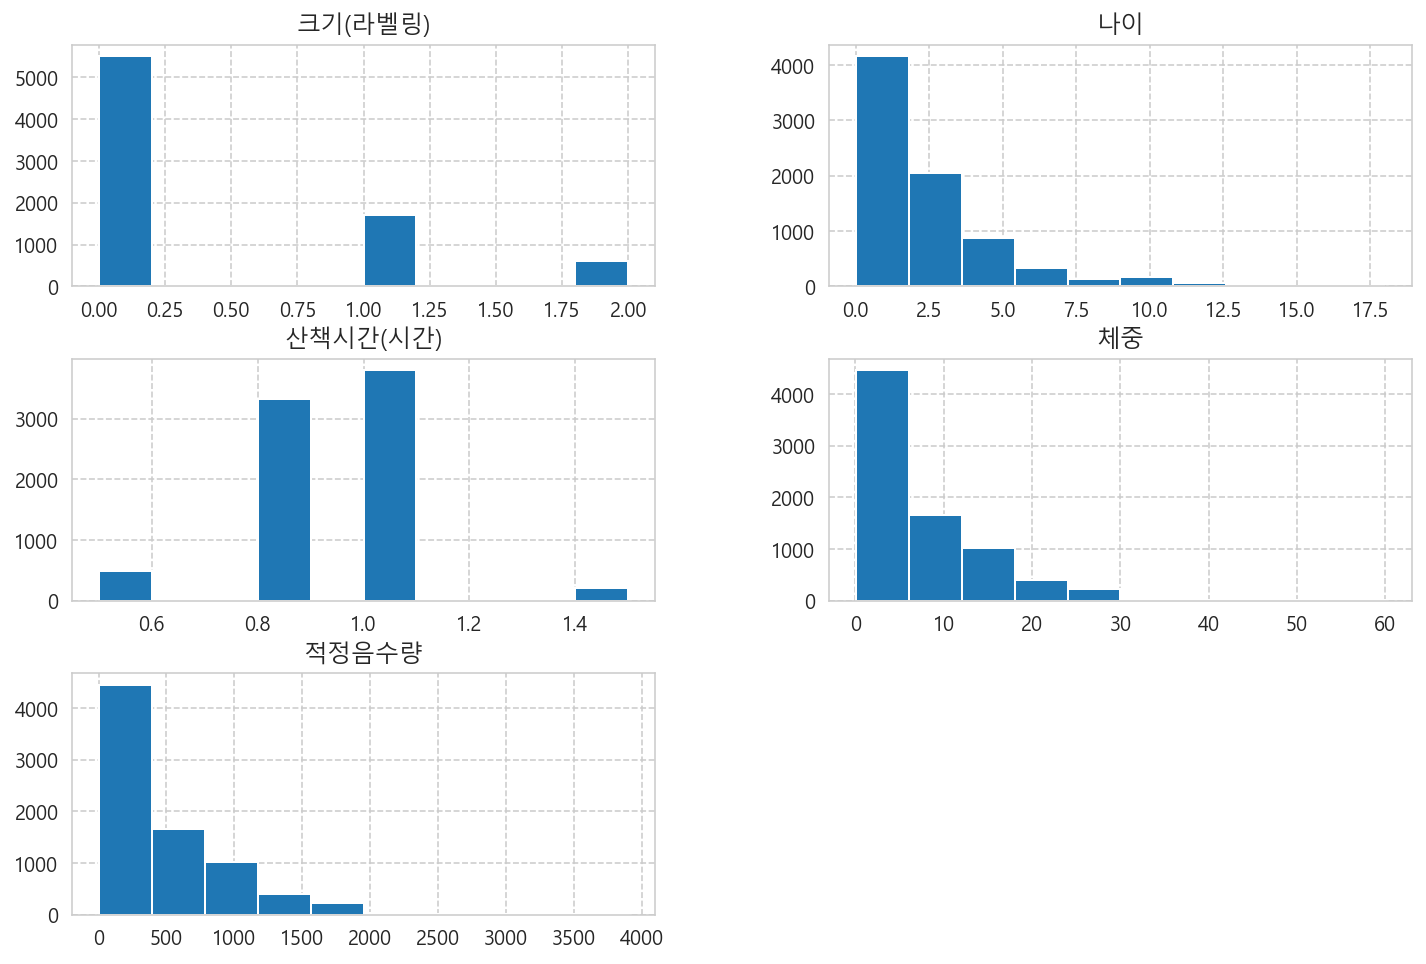

In [20]:
df1.hist(figsize = (12,8))
plt.show()

- 품종, 크기 컬럼은 따로 빼놓자

In [21]:
kind = df1['품종']
size = df1['크기(라벨링)']

In [22]:
print(kind,size)

0       골든 리트리버
1       골든 리트리버
2       골든 리트리버
3       골든 리트리버
4       골든 리트리버
         ...   
7821      핏불테리어
7822     화이트테리어
7823     화이트테리어
7824         휘펫
7825         휘펫
Name: 품종, Length: 7826, dtype: object 0       2
1       2
2       2
3       2
4       2
       ..
7821    2
7822    0
7823    0
7824    1
7825    1
Name: 크기(라벨링), Length: 7826, dtype: int64


In [23]:
del df1['품종']
# del df1['크기(라벨링)']

In [24]:
# 전처리 데이터저장
# df1.to_csv('./pre_dog_data_0708.csv')

In [25]:
# 저장확인
# pd.read_csv('./pre_dog_data_0708.csv', index_col = 0)

# 6. Feature Extraction

In [26]:
df1.head()

,크기(라벨링),나이,산책시간(시간),체중,적정음수량
0,2,13,0.5,27.0,1755.0
1,2,10,0.5,25.0,1625.0
2,2,9,0.5,40.0,2600.0
3,2,8,0.5,28.0,1820.0
4,2,8,0.5,33.0,2145.0


In [27]:
corr_bar = []

for column in df1.columns:
    print(f"{column}과 크기의 상관관계:{df1[column].corr(df1['크기(라벨링)'])}")
    corr_bar.append(df1[column].corr(df1['크기(라벨링)']))

크기(라벨링)과 크기의 상관관계:1.0
나이과 크기의 상관관계:0.16231373343385805
산책시간(시간)과 크기의 상관관계:0.47157652953696805
체중과 크기의 상관관계:0.9169479589896995
적정음수량과 크기의 상관관계:0.9169479589896998


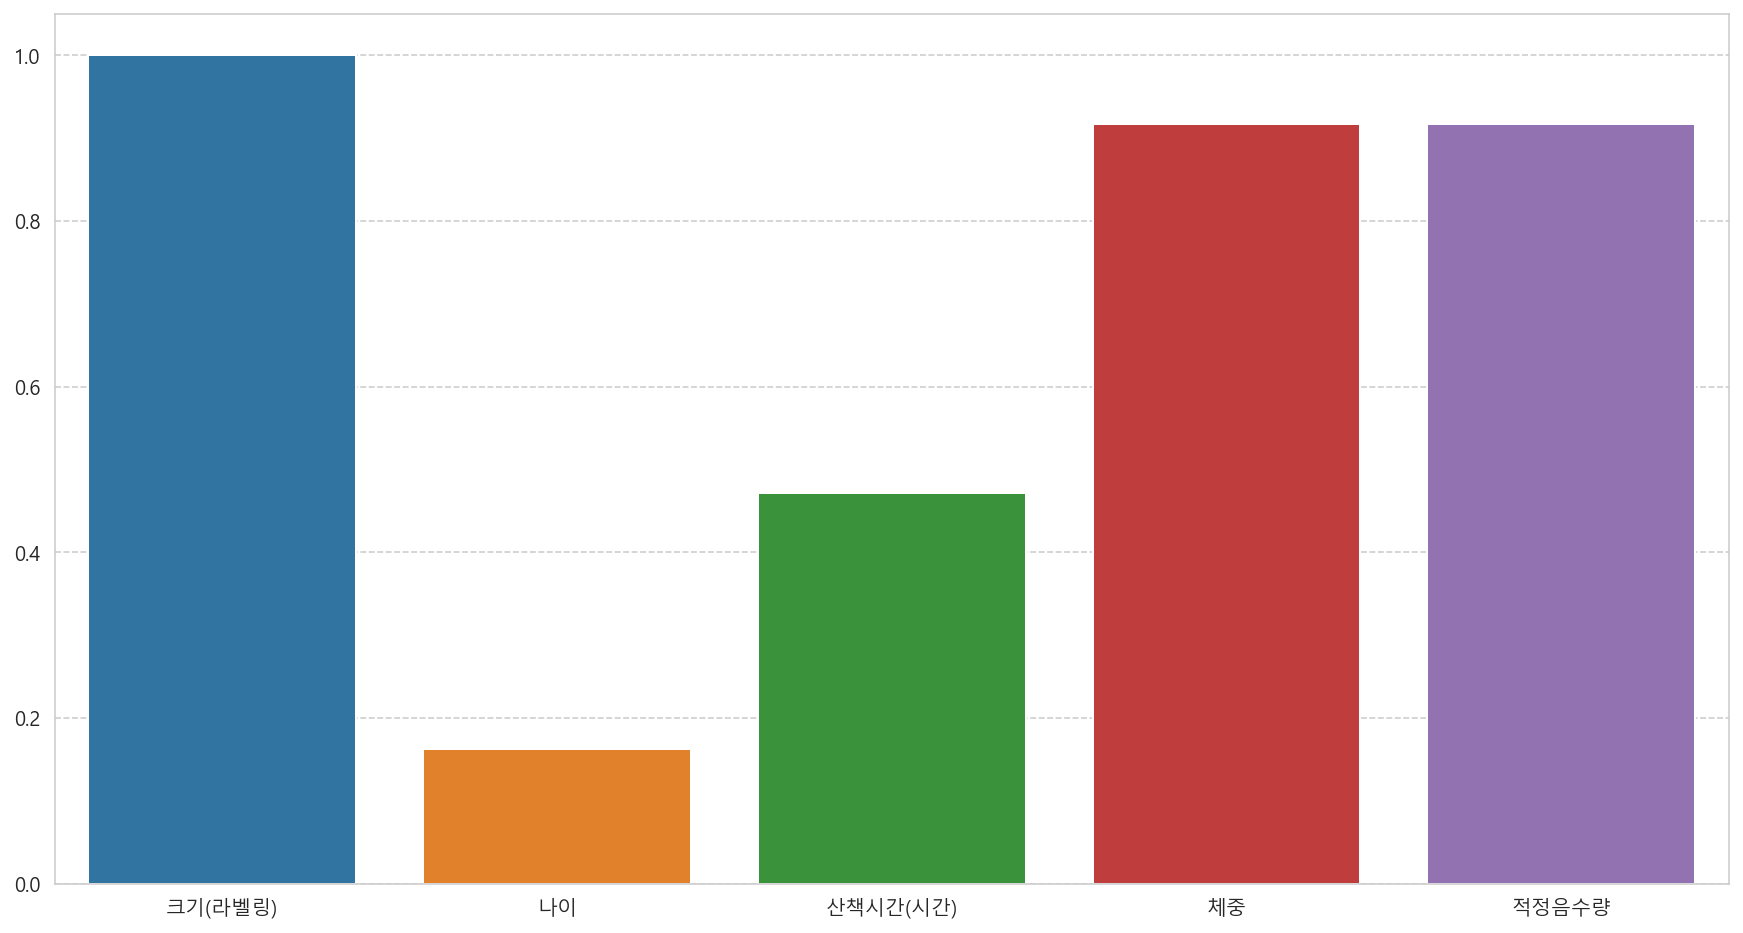

In [28]:
plt.figure(figsize = (15,8))
sns.barplot(df1.columns, corr_bar)
plt.show()

In [29]:
# 크기 삭제
del df1['크기(라벨링)']


# 8. ElboewPoint

In [42]:
data = df1

In [43]:
# 그래프 그리기
x = [] # k가 몇개인지
y =[] # 응집도가 몇인지


for k in range(1,30) :
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    
    x.append(k)
    y.append(kmeans.inertia_)

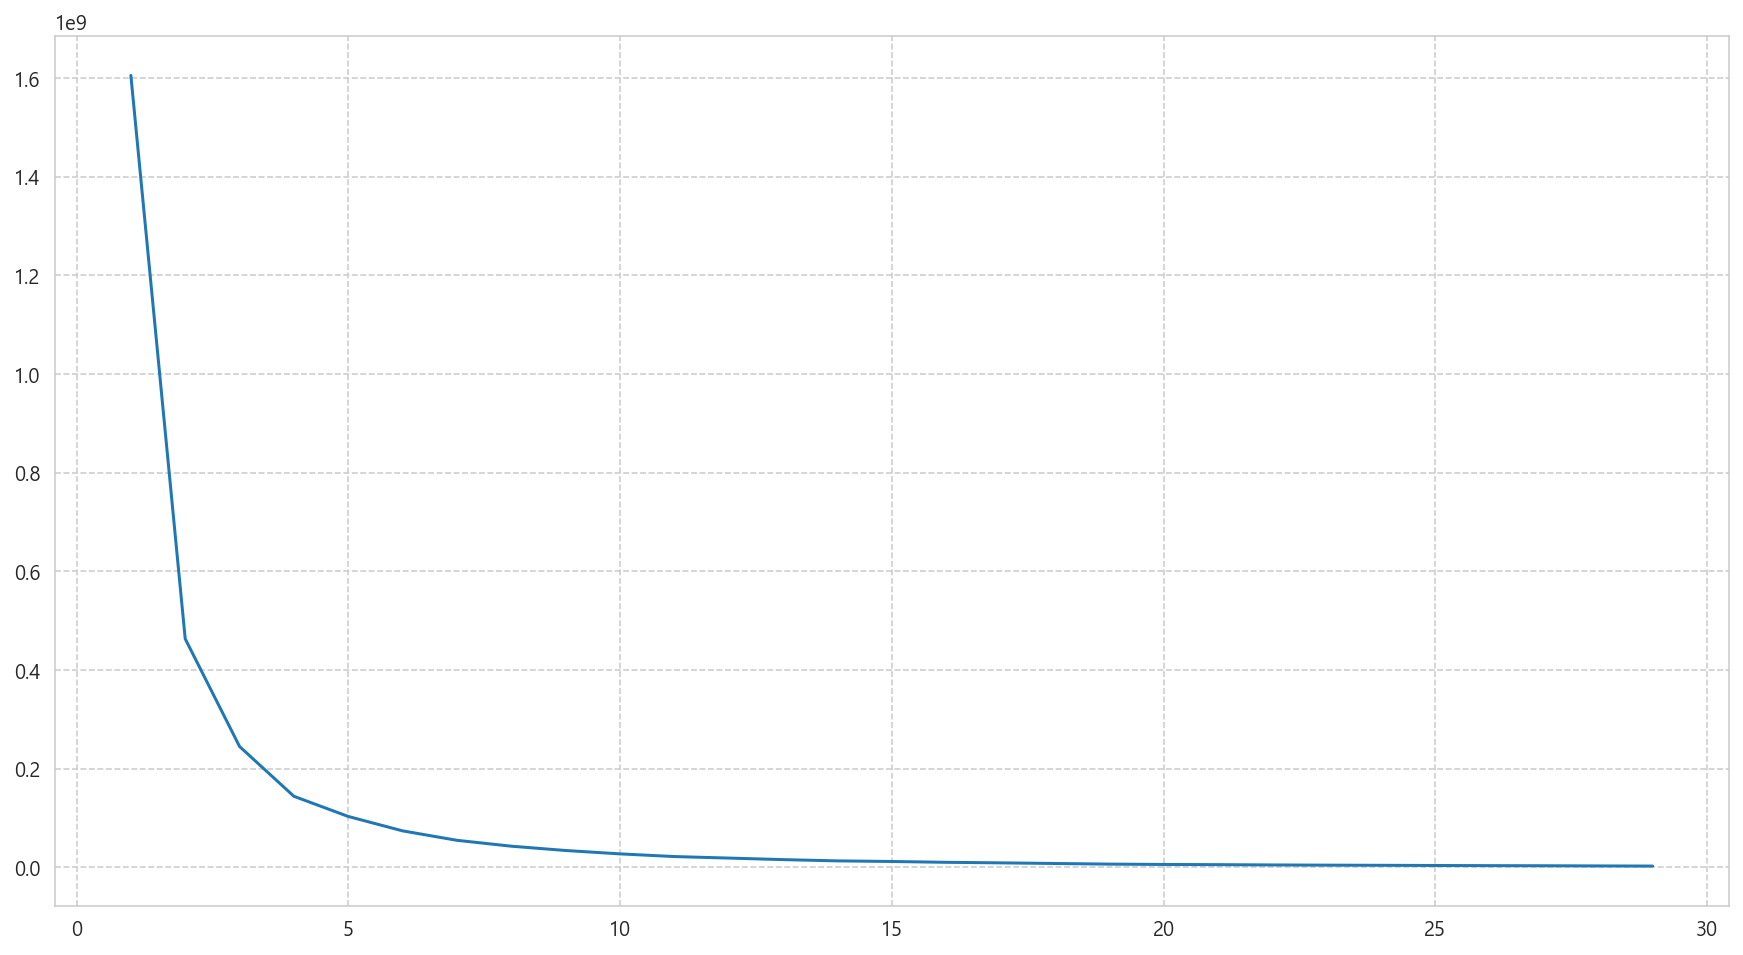

In [44]:
# 그래프 그리기
plt.figure(figsize = (15,8))
plt.plot(x, y)
plt.show()

# 9.군집화(k=4)

In [45]:
kmeans = KMeans(n_clusters = 4 )

In [46]:
kmeans.fit(data)

KMeans(n_clusters=4)

In [47]:
print(kmeans.cluster_centers_[0])
print(kmeans.cluster_centers_[1])
print(kmeans.cluster_centers_[2])

[  1.57887291   0.82662108   2.98801934 194.22125678   1.        ]
[2.71076923e+00 9.95076923e-01 1.63181154e+01 1.06067750e+03
 2.57307692e+00]
[3.32412060e+00 1.13844221e+00 2.73484673e+01 1.77765038e+03
 2.09547739e+00]


In [48]:
data

,나이,산책시간(시간),체중,적정음수량,labels
0,13,0.5,27.0,1755.0,2
1,10,0.5,25.0,1625.0,2
2,9,0.5,40.0,2600.0,2
3,8,0.5,28.0,1820.0,2
4,8,0.5,33.0,2145.0,2
...,...,...,...,...,...
7821,2,1.5,25.0,1625.0,2
7822,13,0.5,7.3,474.5,0
7823,5,1.5,5.0,325.0,1
7824,2,1.0,14.0,910.0,3


In [49]:
data['labels'] = kmeans.predict(data)

In [50]:
data.head()

,나이,산책시간(시간),체중,적정음수량,labels
0,13,0.5,27.0,1755.0,2
1,10,0.5,25.0,1625.0,2
2,9,0.5,40.0,2600.0,2
3,8,0.5,28.0,1820.0,2
4,8,0.5,33.0,2145.0,2


In [51]:
data['labels'].value_counts()

0    4241
3    1887
1    1300
2     398
Name: labels, dtype: int64

In [56]:
scaler = StandardScaler()

In [57]:
scaler_data = scaler.fit_transform(data)

In [60]:
tsne = TSNE()
data_tsne = pd.DataFrame(data = tsne.fit_transform(scaler_data), columns = ['tsne1', 'tsne2']) 

In [61]:
data_tsne['labels'] = data['labels']

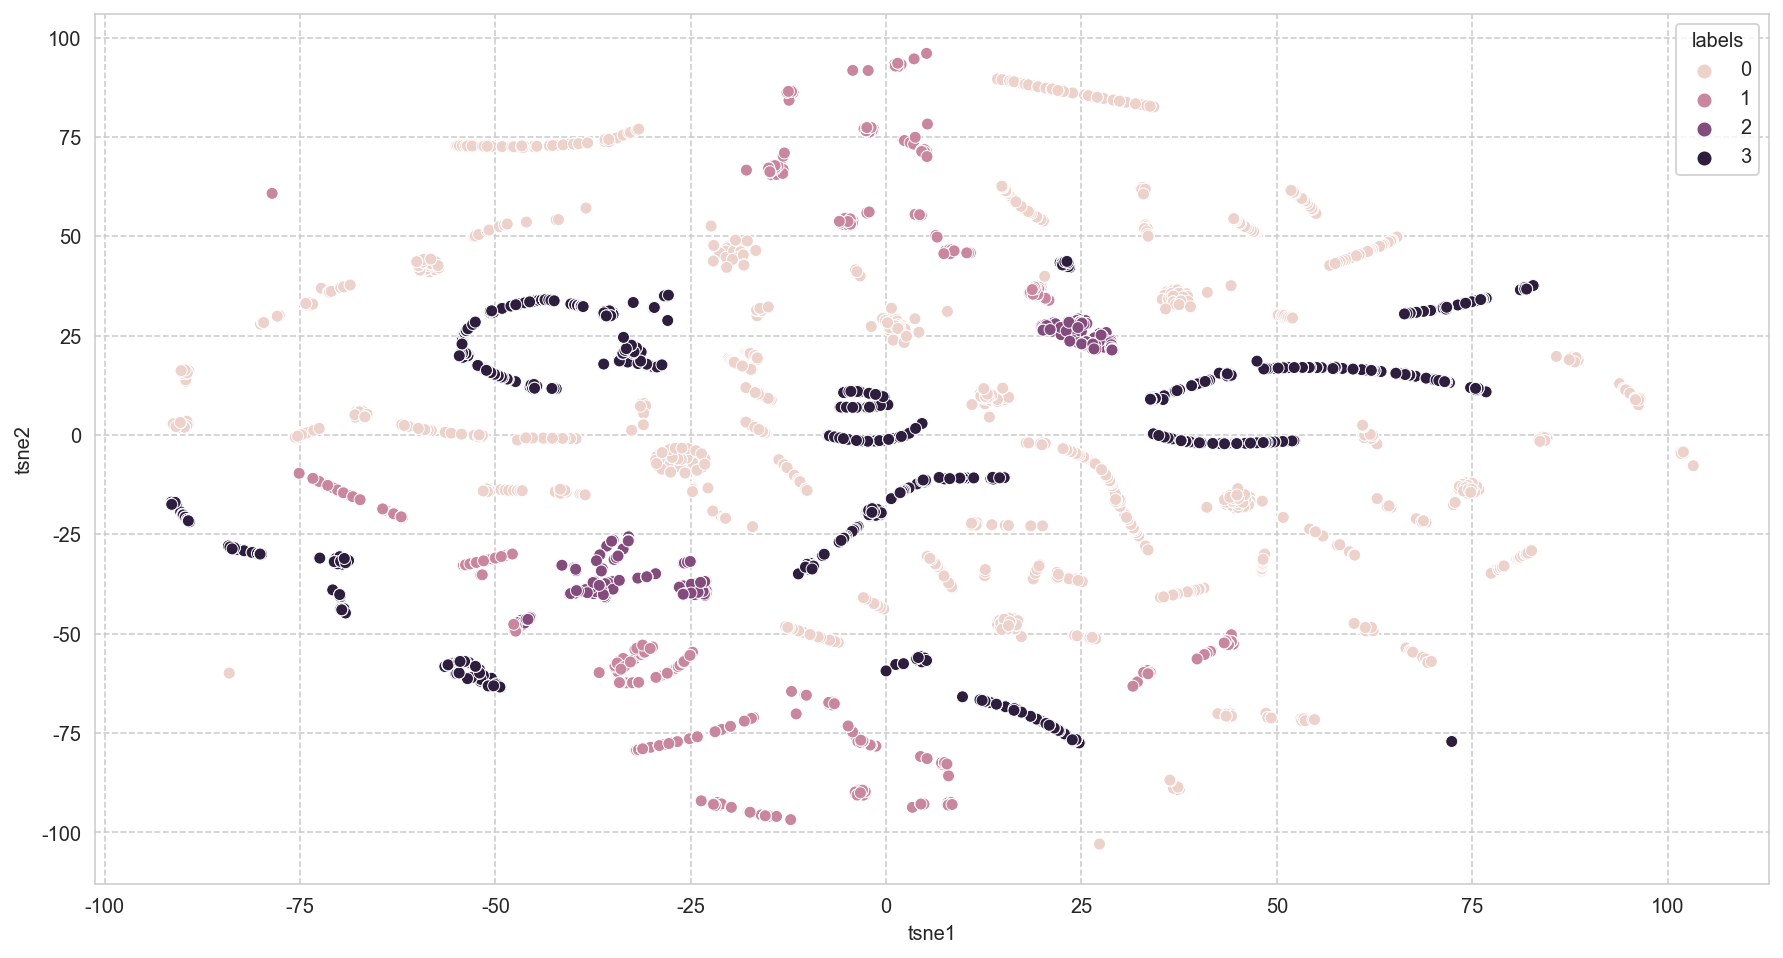

In [62]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'tsne1', y = 'tsne2', hue = 'labels', data = data_tsne)
plt.show()

# 10.결과해석 & 시각화
## (1) 앞에 빼놨던 컬럼 붙이기

In [63]:
data

,나이,산책시간(시간),체중,적정음수량,labels
0,13,0.5,27.0,1755.0,2
1,10,0.5,25.0,1625.0,2
2,9,0.5,40.0,2600.0,2
3,8,0.5,28.0,1820.0,2
4,8,0.5,33.0,2145.0,2
...,...,...,...,...,...
7821,2,1.5,25.0,1625.0,2
7822,13,0.5,7.3,474.5,3
7823,5,1.5,5.0,325.0,0
7824,2,1.0,14.0,910.0,1


In [64]:
df1

,나이,산책시간(시간),체중,적정음수량,labels
0,13,0.5,27.0,1755.0,2
1,10,0.5,25.0,1625.0,2
2,9,0.5,40.0,2600.0,2
3,8,0.5,28.0,1820.0,2
4,8,0.5,33.0,2145.0,2
...,...,...,...,...,...
7821,2,1.5,25.0,1625.0,2
7822,13,0.5,7.3,474.5,3
7823,5,1.5,5.0,325.0,0
7824,2,1.0,14.0,910.0,1


In [65]:
df1['크기'] = size
df1['품종'] = kind
df1['labels'] = data['labels']

In [66]:
df1.head()

,나이,산책시간(시간),체중,적정음수량,labels,크기,품종
0,13,0.5,27.0,1755.0,2,2,골든 리트리버
1,10,0.5,25.0,1625.0,2,2,골든 리트리버
2,9,0.5,40.0,2600.0,2,2,골든 리트리버
3,8,0.5,28.0,1820.0,2,2,골든 리트리버
4,8,0.5,33.0,2145.0,2,2,골든 리트리버


In [67]:
df1.columns.to_list()

['나이', '산책시간(시간)', '체중', '적정음수량', 'labels', '크기', '품종']

In [68]:
df1 = df1[['품종', '크기', '나이', '산책시간(시간)', '체중', '적정음수량', 'labels']]

In [69]:
df1.head()

,품종,크기,나이,산책시간(시간),체중,적정음수량,labels
0,골든 리트리버,2,13,0.5,27.0,1755.0,2
1,골든 리트리버,2,10,0.5,25.0,1625.0,2
2,골든 리트리버,2,9,0.5,40.0,2600.0,2
3,골든 리트리버,2,8,0.5,28.0,1820.0,2
4,골든 리트리버,2,8,0.5,33.0,2145.0,2


## (2) 그룹별 갯수 시각화

In [70]:
(df1['labels'].value_counts(normalize = True)*100).round(1)

0    54.2
3    24.1
1    16.6
2     5.1
Name: labels, dtype: float64

<AxesSubplot:>

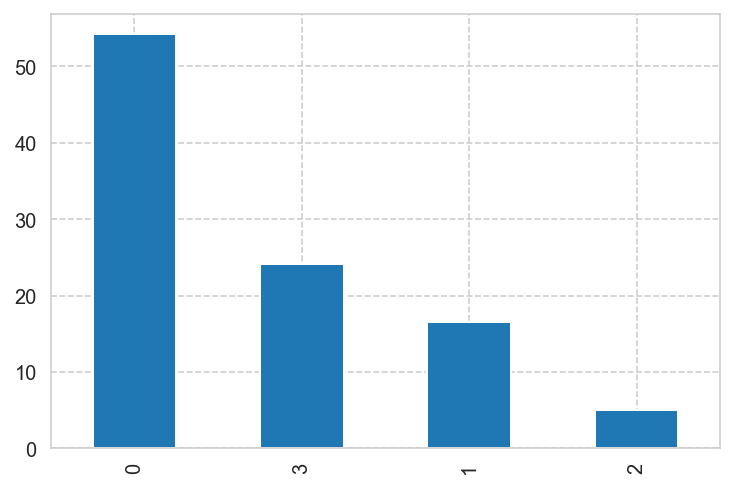

In [71]:
(df1['labels'].value_counts(normalize = True)*100).round(1).plot.bar()

## (3) 그룹별 평균 크기 비교

In [98]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
size0 = df1[df1['labels'] == 0]['크기'].mean()
size1 = df1[df1['labels'] == 1]['크기'].mean()
size2 = df1[df1['labels'] == 2]['크기'].mean()
size3 = df1[df1['labels'] == 3]['크기'].mean()

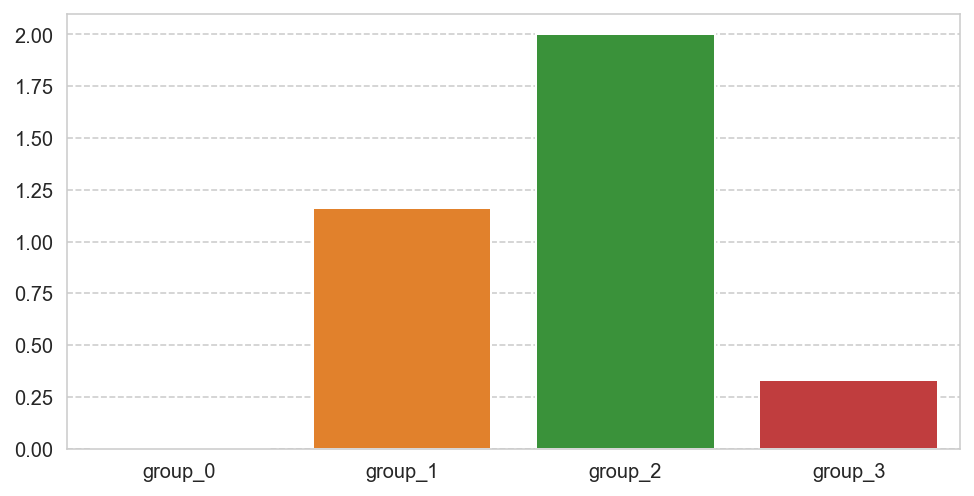

In [99]:
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (8,4))
sns.barplot(x = ['group_0', 'group_1', 'group_2', 'group_3'], y = [size0, size1, size2, size3] )
plt.show()

## (4) 그룹별 평균 나이 비교

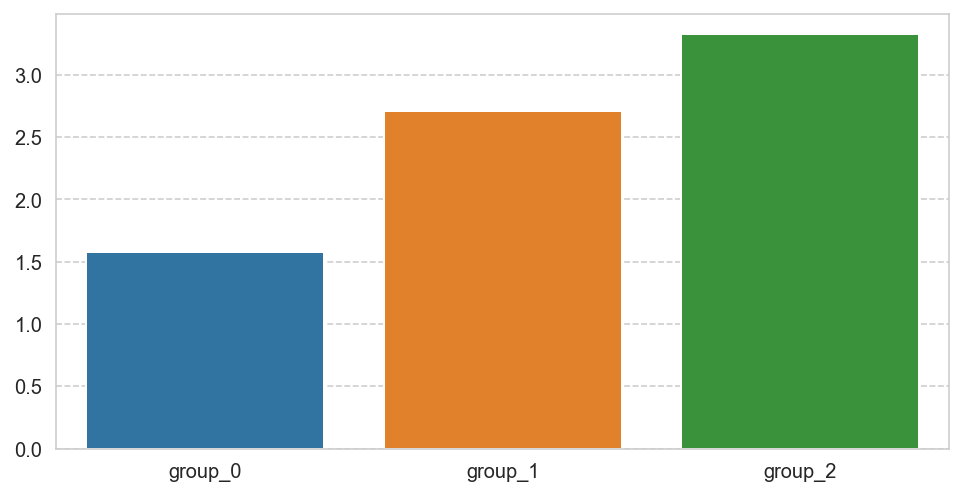

In [100]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
age0 = df1[df1['labels'] == 0]['나이'].mean()
age1 = df1[df1['labels'] == 1]['나이'].mean()
age2 = df1[df1['labels'] == 2]['나이'].mean()
age3 = df1[df1['labels'] == 3]['나이'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (8,4))
sns.barplot(x = ['group_0', 'group_1', 'group_2'], y = [age0, age1, age2, age2] )
plt.show()

## (5) 그룹별 평균 체중비교

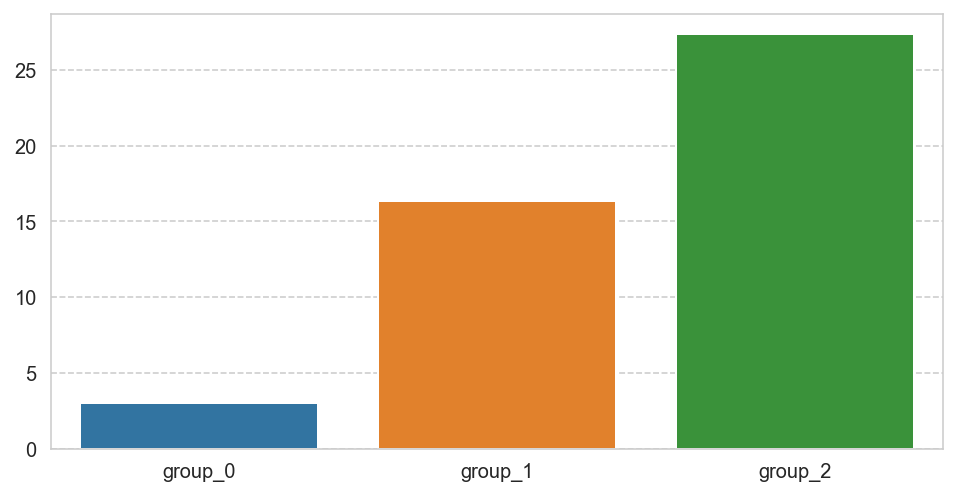

In [75]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
wgt0 = df1[df1['labels'] == 0]['체중'].mean()
wgt1 = df1[df1['labels'] == 1]['체중'].mean()
wgt2 = df1[df1['labels'] == 2]['체중'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (8,4))
sns.barplot(x = ['group_0', 'group_1', 'group_2'], y = [wgt0, wgt1, wgt2] )
plt.show()

## (6) 그룹별 평균 권장 산책시간 비교

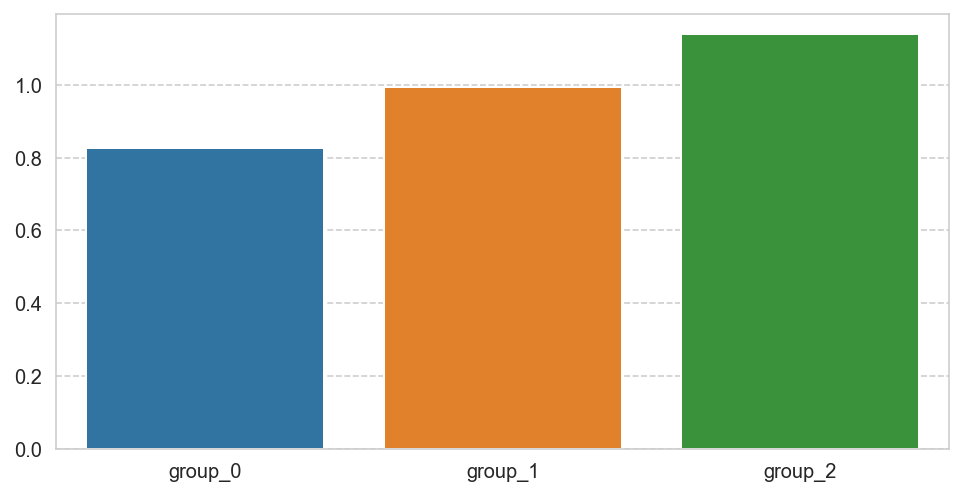

In [76]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
recom0 = df1[df1['labels'] == 0]['산책시간(시간)'].mean()
recom1 = df1[df1['labels'] == 1]['산책시간(시간)'].mean()
recom2 = df1[df1['labels'] == 2]['산책시간(시간)'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (8,4))
sns.barplot(x = ['group_0', 'group_1', 'group_2'], y = [recom0, recom1, recom2] )
plt.show()

## (7)그룹별 특징
- 나이를 기준으로 비교

In [77]:
df1.head()

,품종,크기,나이,산책시간(시간),체중,적정음수량,labels
0,골든 리트리버,2,13,0.5,27.0,1755.0,2
1,골든 리트리버,2,10,0.5,25.0,1625.0,2
2,골든 리트리버,2,9,0.5,40.0,2600.0,2
3,골든 리트리버,2,8,0.5,28.0,1820.0,2
4,골든 리트리버,2,8,0.5,33.0,2145.0,2


In [101]:
group = df1[(df1['labels']==0) | (df1['labels']==1) | (df1['labels']==2) | (df1['labels']==3)]

In [102]:
group['labels'].value_counts()

0    4241
3    1887
1    1300
2     398
Name: labels, dtype: int64

In [103]:
group1 = group.groupby('labels').mean().reset_index()
group1

,labels,크기,나이,산책시간(시간),체중,적정음수량
0,0,0.000000,1.578873,0.826621,2.988019,194.221257
1,1,1.161538,2.710769,0.995077,16.318115,1060.677500
2,2,2.000000,3.324121,1.138442,27.348467,1777.650377
3,3,0.331214,2.590355,0.937944,8.598744,558.918362


In [104]:
column = group1.columns
column

Index(['labels', '크기', '나이', '산책시간(시간)', '체중', '적정음수량'], dtype='object')

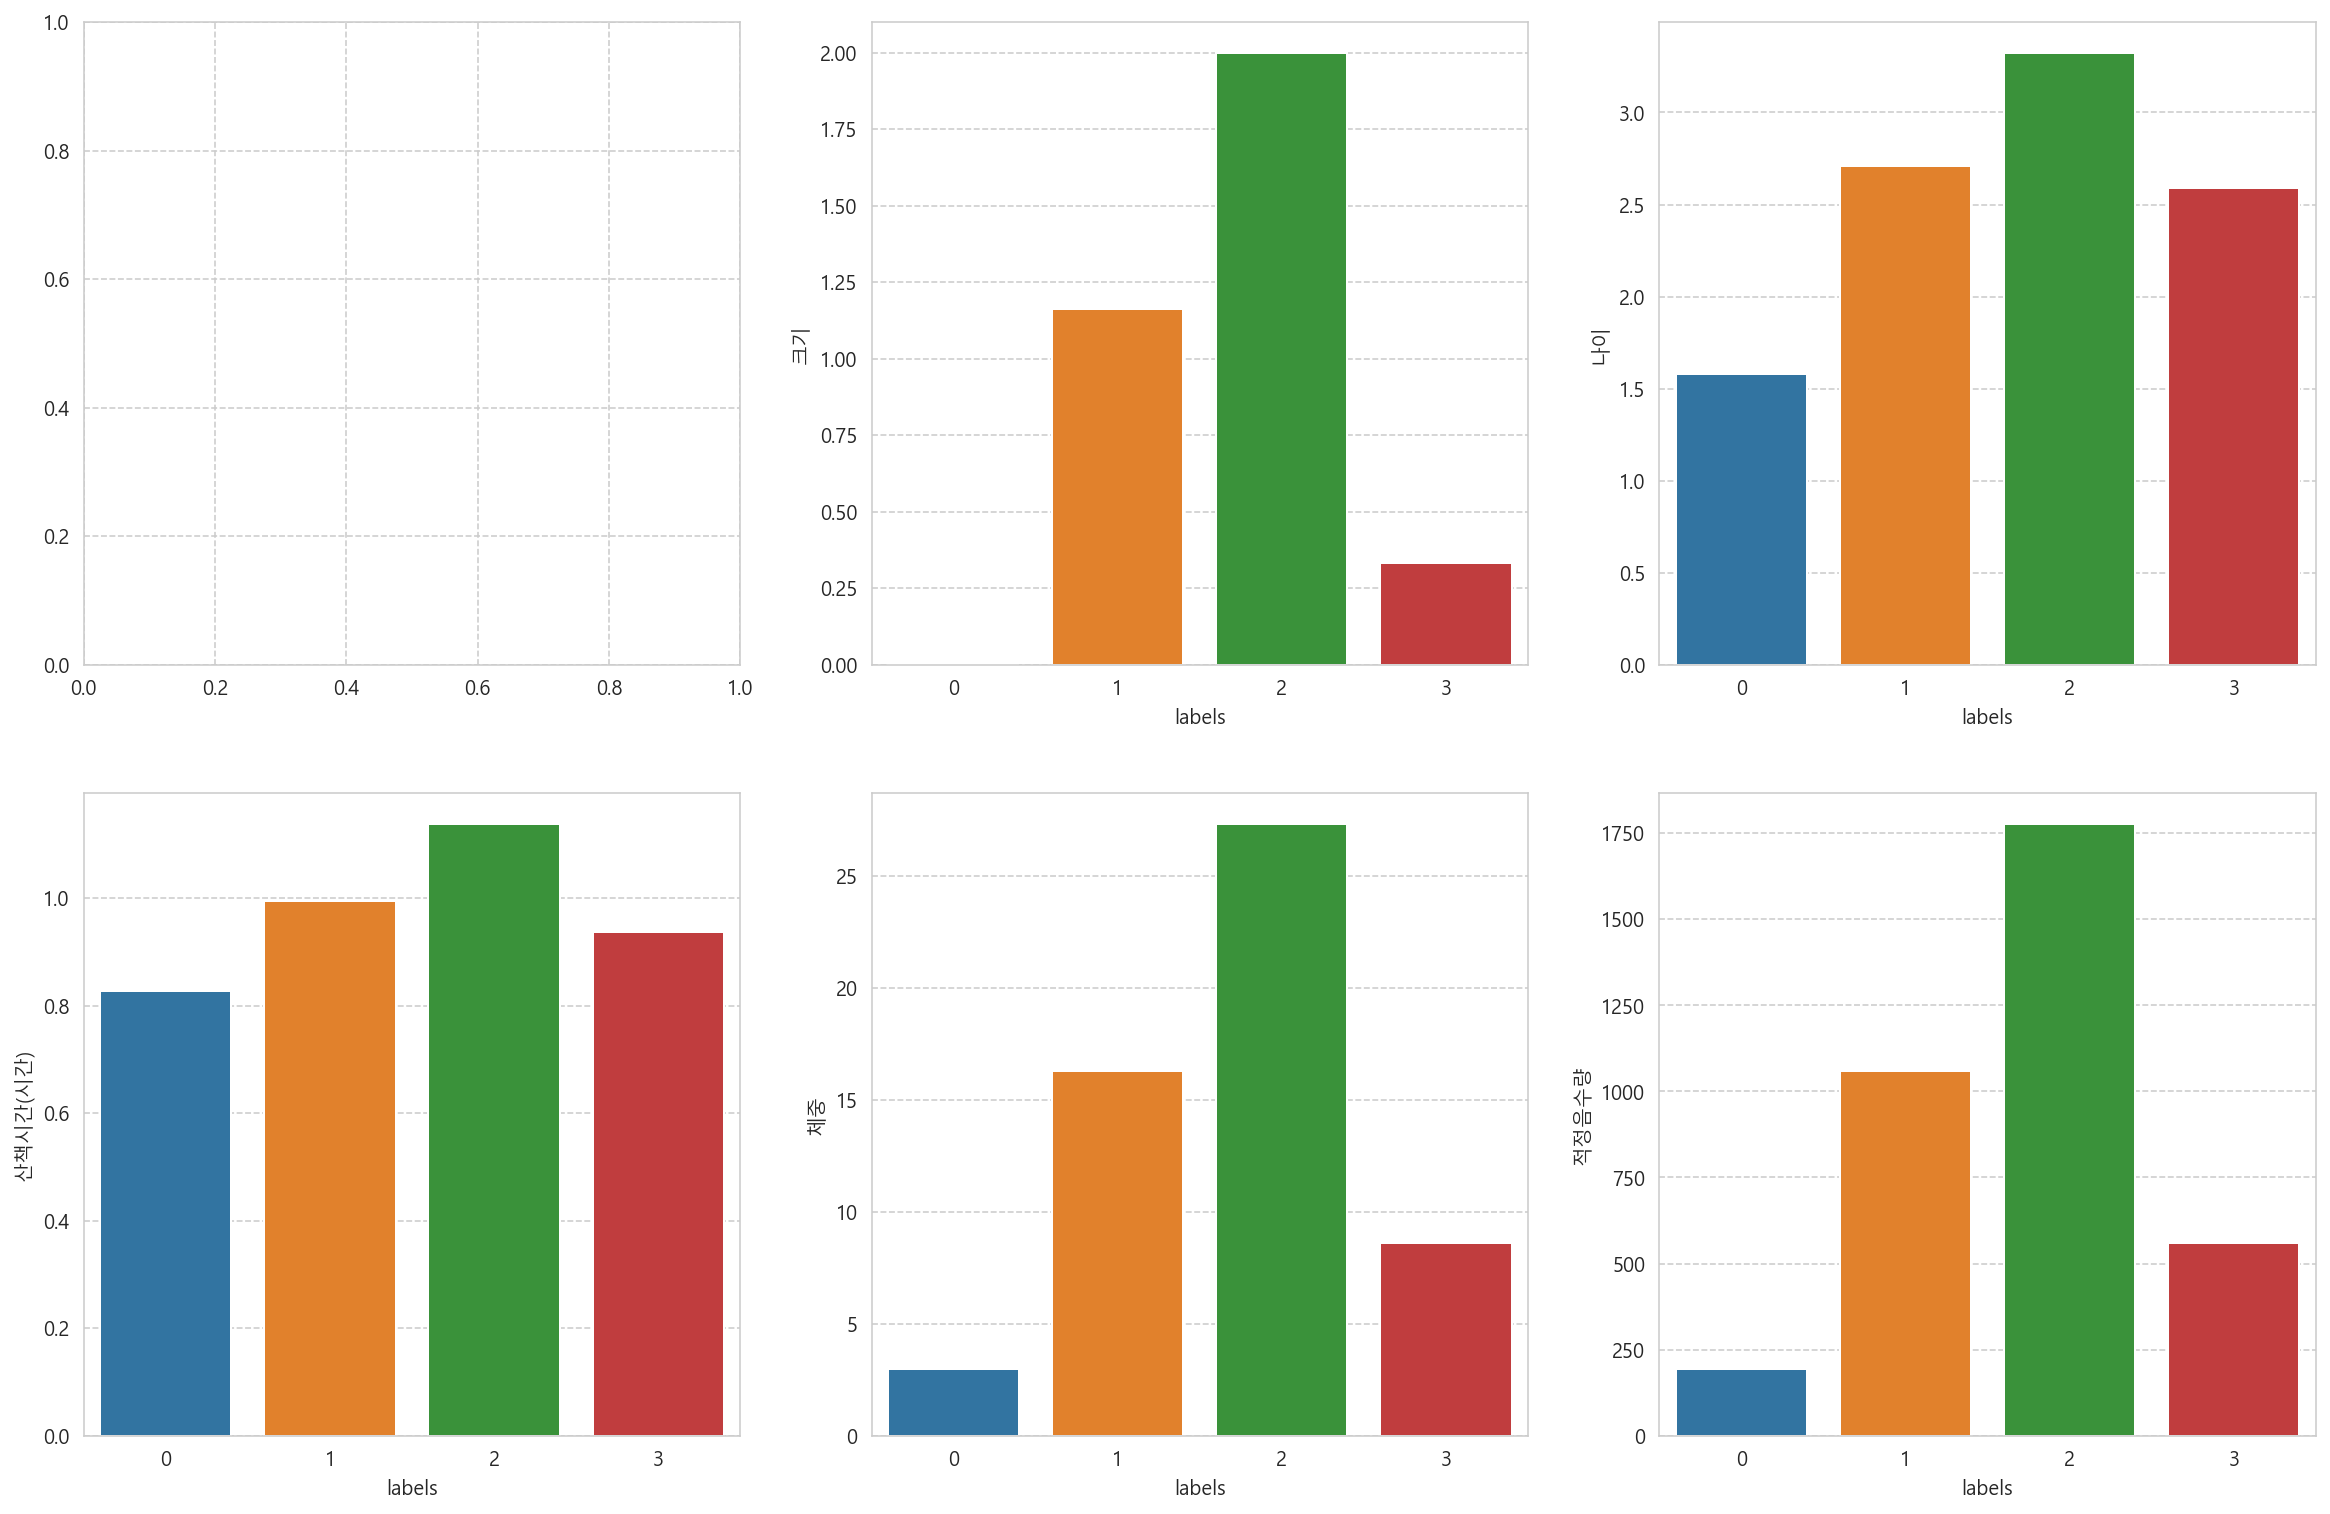

In [113]:
# 반복문으로 그림그리기
f, ax = plt.subplots(2,3,figsize=(20,13))

for i in range(1,6):
        sns.barplot(x='labels', y=column[i], data=group1, ax = ax[i//3, i%3])

# sns.barplot(x='labels', y='크기', data = group, ax = ax[0,0])
# sns.barplot(x='labels', y='나이', data = group, ax = ax[0,1])
# sns.barplot(x='labels', y='체중', data = group, ax = ax[1,0])

plt.show()

In [106]:
df1[df1['labels']==0].describe()

,크기,나이,산책시간(시간),체중,적정음수량,labels
count,4241.0,4241.000000,4241.000000,4241.000000,4241.000000,4241.0
mean,0.0,1.578873,0.826621,2.988019,194.221257,0.0
std,0.0,2.876952,0.130785,1.399728,90.982309,0.0
min,0.0,0.000000,0.500000,0.040000,2.600000,0.0
25%,0.0,0.000000,0.800000,2.000000,130.000000,0.0
50%,0.0,0.000000,0.800000,3.000000,195.000000,0.0
75%,0.0,2.000000,0.800000,4.000000,260.000000,0.0
max,0.0,18.000000,1.500000,5.750000,373.750000,0.0


In [107]:
df1[df1['labels']==1].describe()

,크기,나이,산책시간(시간),체중,적정음수량,labels
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.0
mean,1.161538,2.710769,0.995077,16.318115,1060.677500,1.0
std,0.368169,1.775127,0.121095,2.431443,158.043805,0.0
min,1.000000,0.000000,0.500000,12.460000,809.900000,1.0
25%,1.000000,2.000000,1.000000,14.500000,942.500000,1.0
50%,1.000000,2.000000,1.000000,16.000000,1040.000000,1.0
75%,1.000000,3.000000,1.000000,18.000000,1170.000000,1.0
max,2.000000,14.000000,1.500000,21.700000,1410.500000,1.0


In [108]:
df1[df1['labels']==2].describe()

,크기,나이,산책시간(시간),체중,적정음수량,labels
count,398.0,398.000000,398.000000,398.000000,398.000000,398.0
mean,2.0,3.324121,1.138442,27.348467,1777.650377,2.0
std,0.0,1.844857,0.274444,5.279503,343.167686,0.0
min,2.0,0.000000,0.500000,22.000000,1430.000000,2.0
25%,2.0,2.000000,1.000000,24.000000,1560.000000,2.0
50%,2.0,3.000000,1.000000,25.000000,1625.000000,2.0
75%,2.0,4.000000,1.500000,30.000000,1950.000000,2.0
max,2.0,13.000000,1.500000,60.000000,3900.000000,2.0


In [109]:
df1.head()

,품종,크기,나이,산책시간(시간),체중,적정음수량,labels
0,골든 리트리버,2,13,0.5,27.0,1755.0,2
1,골든 리트리버,2,10,0.5,25.0,1625.0,2
2,골든 리트리버,2,9,0.5,40.0,2600.0,2
3,골든 리트리버,2,8,0.5,28.0,1820.0,2
4,골든 리트리버,2,8,0.5,33.0,2145.0,2


In [110]:
df1[df1['labels'] == 0]['품종'].value_counts().head(20)


믹스견             3181
말티즈              335
푸들               222
포메라니안            155
치와와               68
요크셔 테리어           46
시츄                46
비숑 프리제            28
진도견               25
닥스훈트              24
풍산견               18
스피츠               15
미니어쳐핀셔            10
슈나우져               9
프렌치불독              8
라브라도리트리버           7
시바견                5
라이카                5
이탈리안 그레이 하운드       4
미니어쳐 푸들            4
Name: 품종, dtype: int64

In [111]:
df1[df1['labels'] == 1]['품종'].value_counts().head(20)

믹스견         1012
진도견           79
보더콜리          21
시베리안허스키       15
라브라도리트리버      14
포인터           14
사모예드          12
웰시코기          12
골든 리트리버       10
시바견           10
풍산견            8
비글             7
프렌치불독          7
불독             6
삽살             6
아메리칸불리         6
코카스파니엘         5
도사             5
도베르만           5
차우차우           4
Name: 품종, dtype: int64

In [89]:
df1[df1['labels'] == 2]['품종'].value_counts().head(20)

믹스견         138
라브라도리트리버     66
골든 리트리버      55
진도견          29
시베리안허스키      19
셰퍼드          14
말라뮤트         10
풍산견           9
도사            9
포인터           3
삽살            3
보더콜리          3
스탠다드 푸들       3
그레이트피레니즈      3
로트와일러         3
도베르만          3
아메리칸 아키다      2
케인 코르소        2
아메리칸불리        2
차우차우          2
Name: 품종, dtype: int64

In [115]:
df1[df1['labels'] == 3]['품종'].value_counts().head(20)

믹스견         1407
푸들            79
시바견           51
스피츠           35
프렌치불독         35
웰시코기          34
시츄            30
닥스훈트          23
비숑 프리제        20
진도견           15
코카스파니엘        14
말티즈           13
보스턴테리어        12
포메라니안         12
슈나우져          10
퍼그            10
보더콜리           9
비글             7
풍산견            6
베들링턴 테리어       6
Name: 품종, dtype: int64

In [90]:
df1[df1['labels']==1].describe()

,크기,나이,산책시간(시간),체중,적정음수량,labels
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.0
mean,1.161538,2.710769,0.995077,16.318115,1060.677500,1.0
std,0.368169,1.775127,0.121095,2.431443,158.043805,0.0
min,1.000000,0.000000,0.500000,12.460000,809.900000,1.0
25%,1.000000,2.000000,1.000000,14.500000,942.500000,1.0
50%,1.000000,2.000000,1.000000,16.000000,1040.000000,1.0
75%,1.000000,3.000000,1.000000,18.000000,1170.000000,1.0
max,2.000000,14.000000,1.500000,21.700000,1410.500000,1.0


In [91]:
df1.describe()

,크기,나이,산책시간(시간),체중,적정음수량,labels
count,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000
mean,0.374521,2.099540,0.897304,7.794053,506.613455,0.991183
std,0.624247,2.647694,0.168873,6.967980,452.918710,1.247945
min,0.000000,0.000000,0.500000,0.040000,2.600000,0.000000
25%,0.000000,0.000000,0.800000,3.000000,195.000000,0.000000
50%,0.000000,1.000000,1.000000,5.000000,325.000000,0.000000
75%,1.000000,3.000000,1.000000,11.000000,715.000000,2.000000
max,2.000000,18.000000,1.500000,60.000000,3900.000000,3.000000


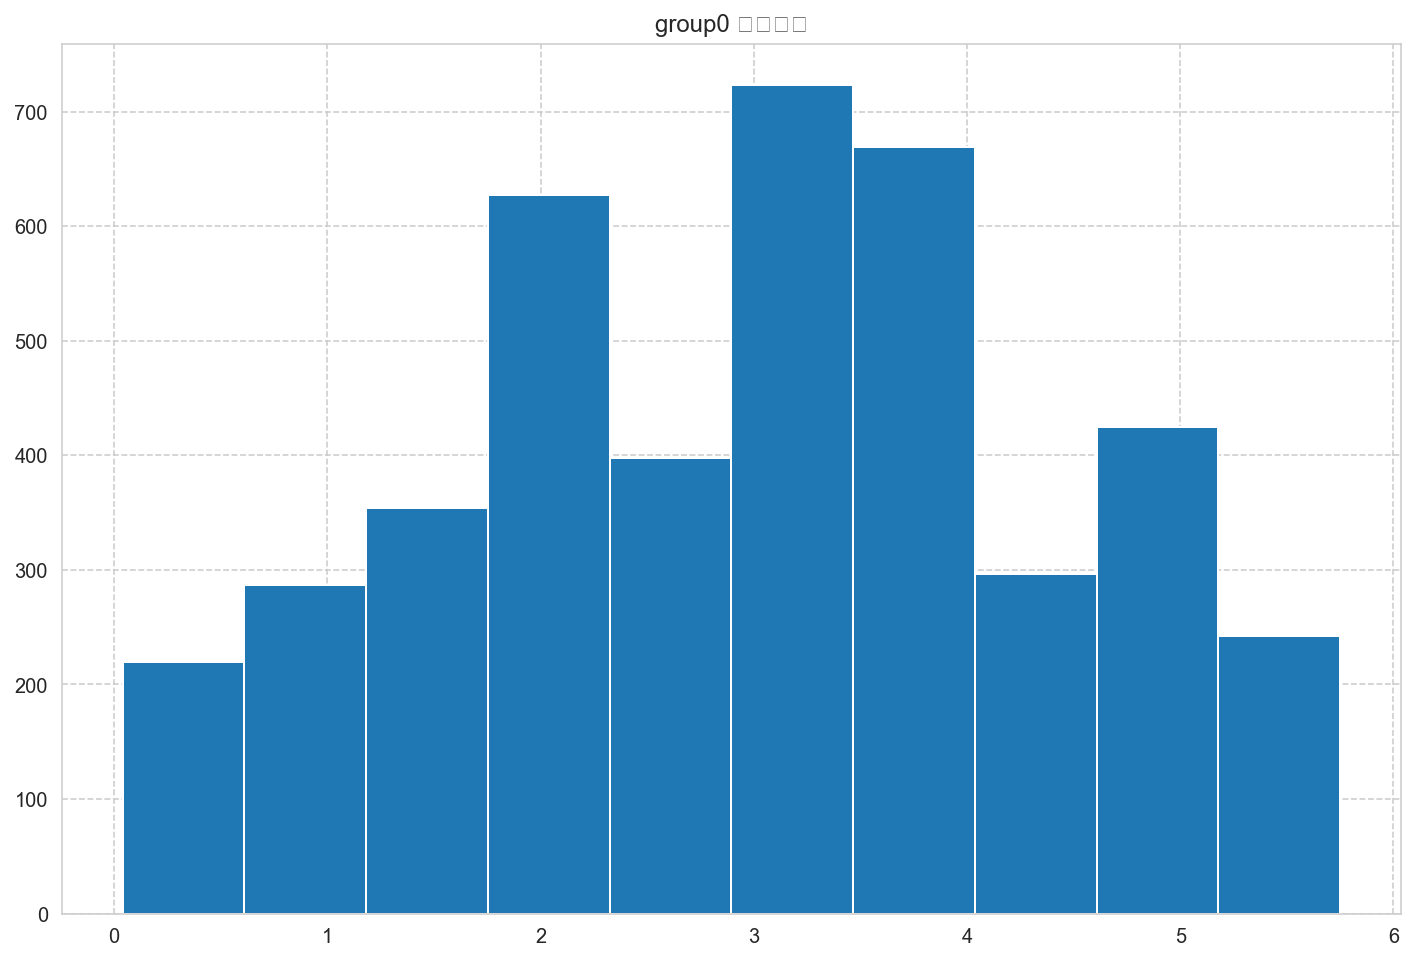

In [92]:
plt.figure(figsize=(12,8))
df1[df1['labels']==0]['체중'].hist()
plt.title('group0 체중분포')
plt.show()

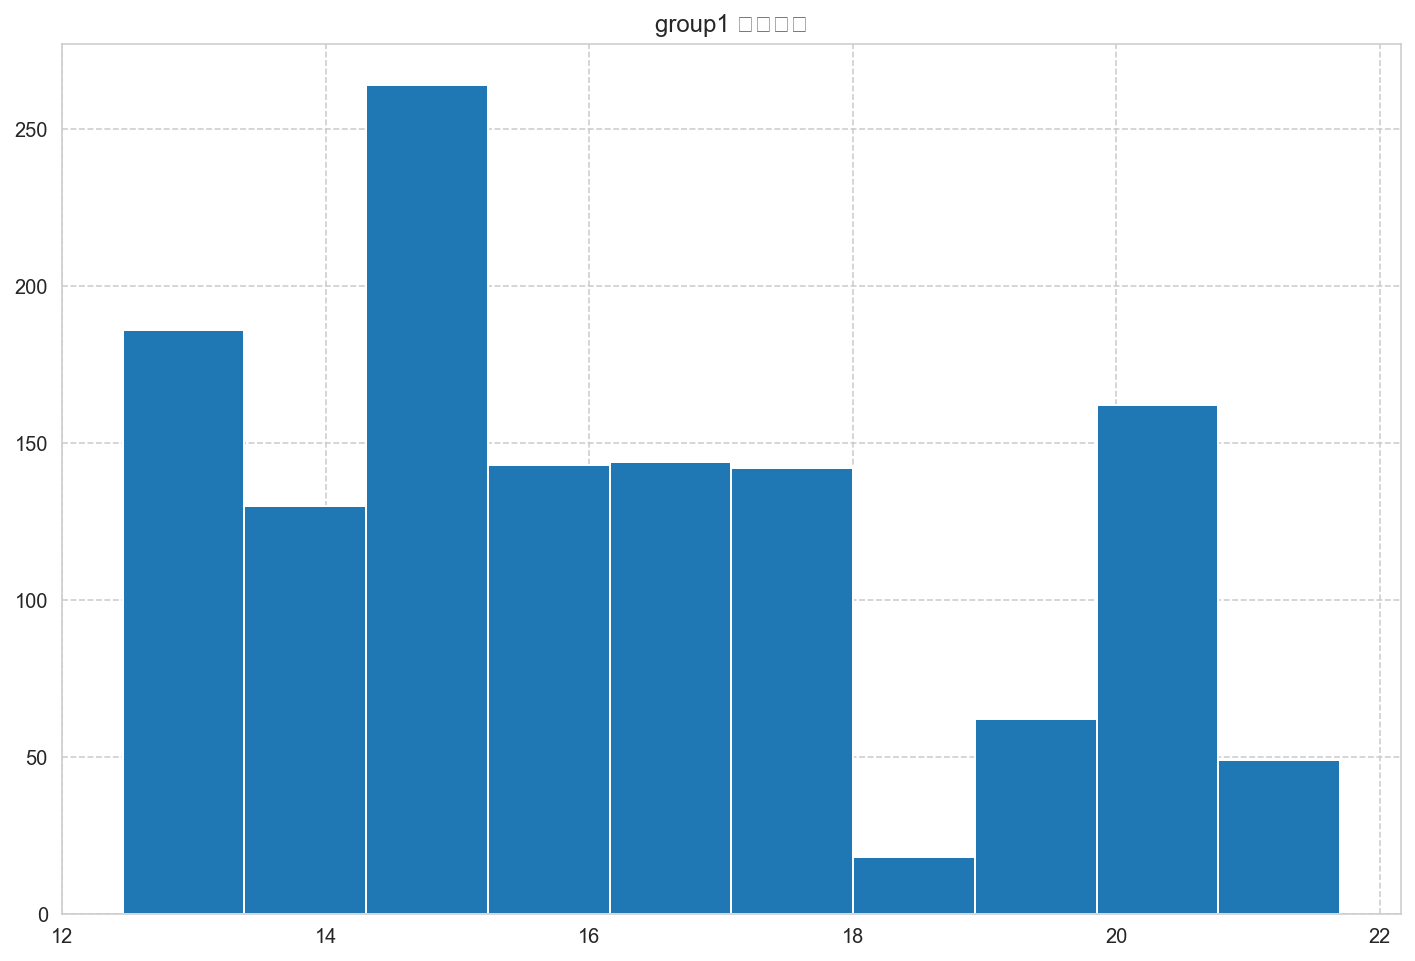

In [93]:
plt.figure(figsize=(12,8))
df1[df1['labels']==1]['체중'].hist()
plt.title('group1 체중분포')
plt.show()

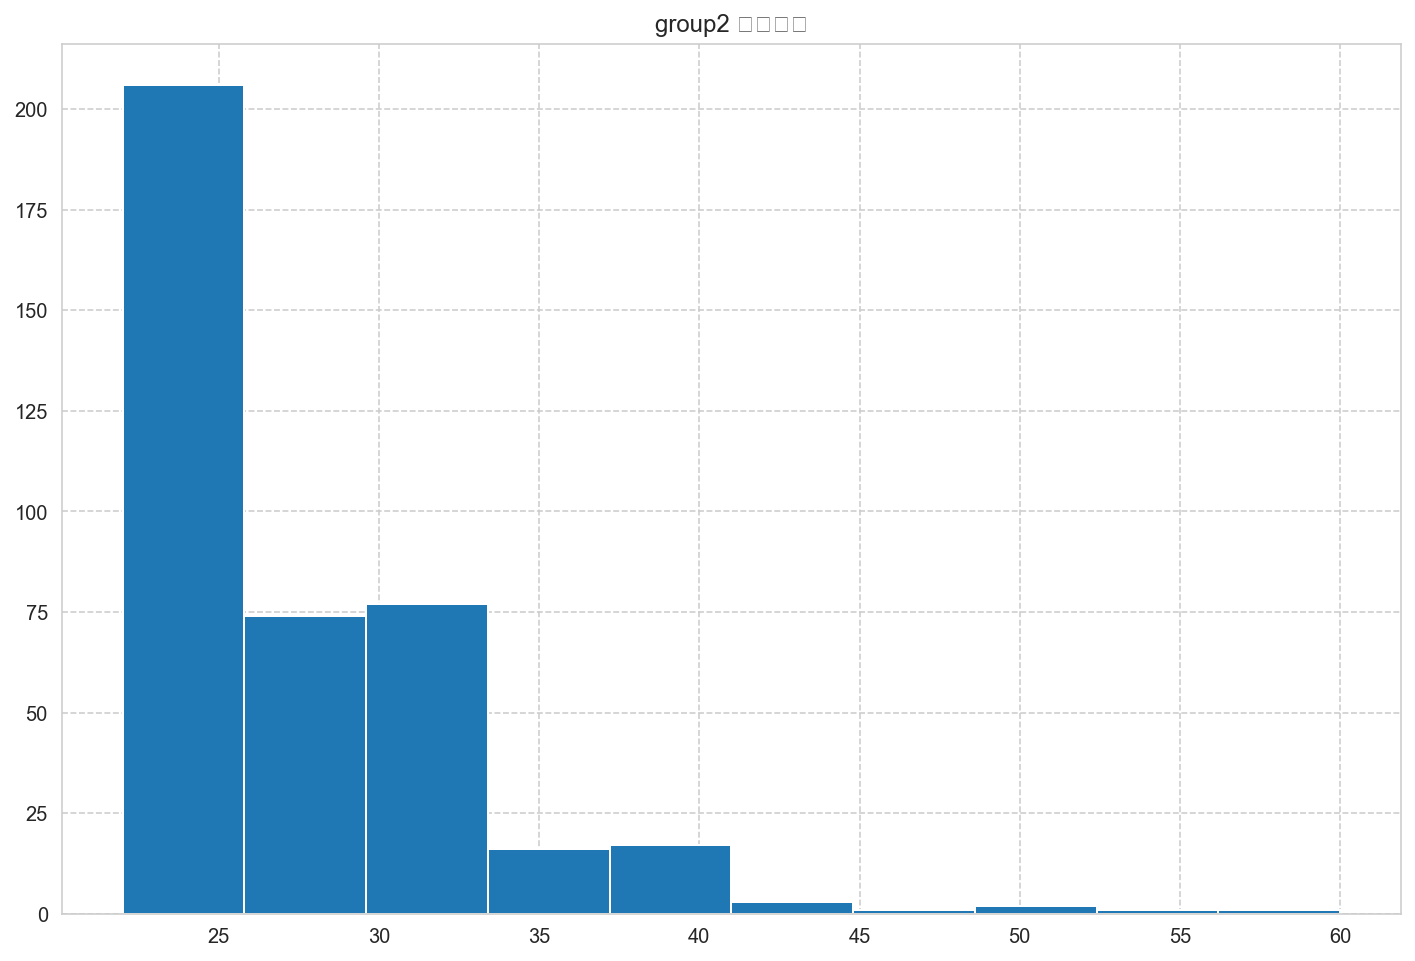

In [94]:
plt.figure(figsize=(12,8))
df1[df1['labels']==2]['체중'].hist()
plt.title('group2 체중분포')
plt.show()


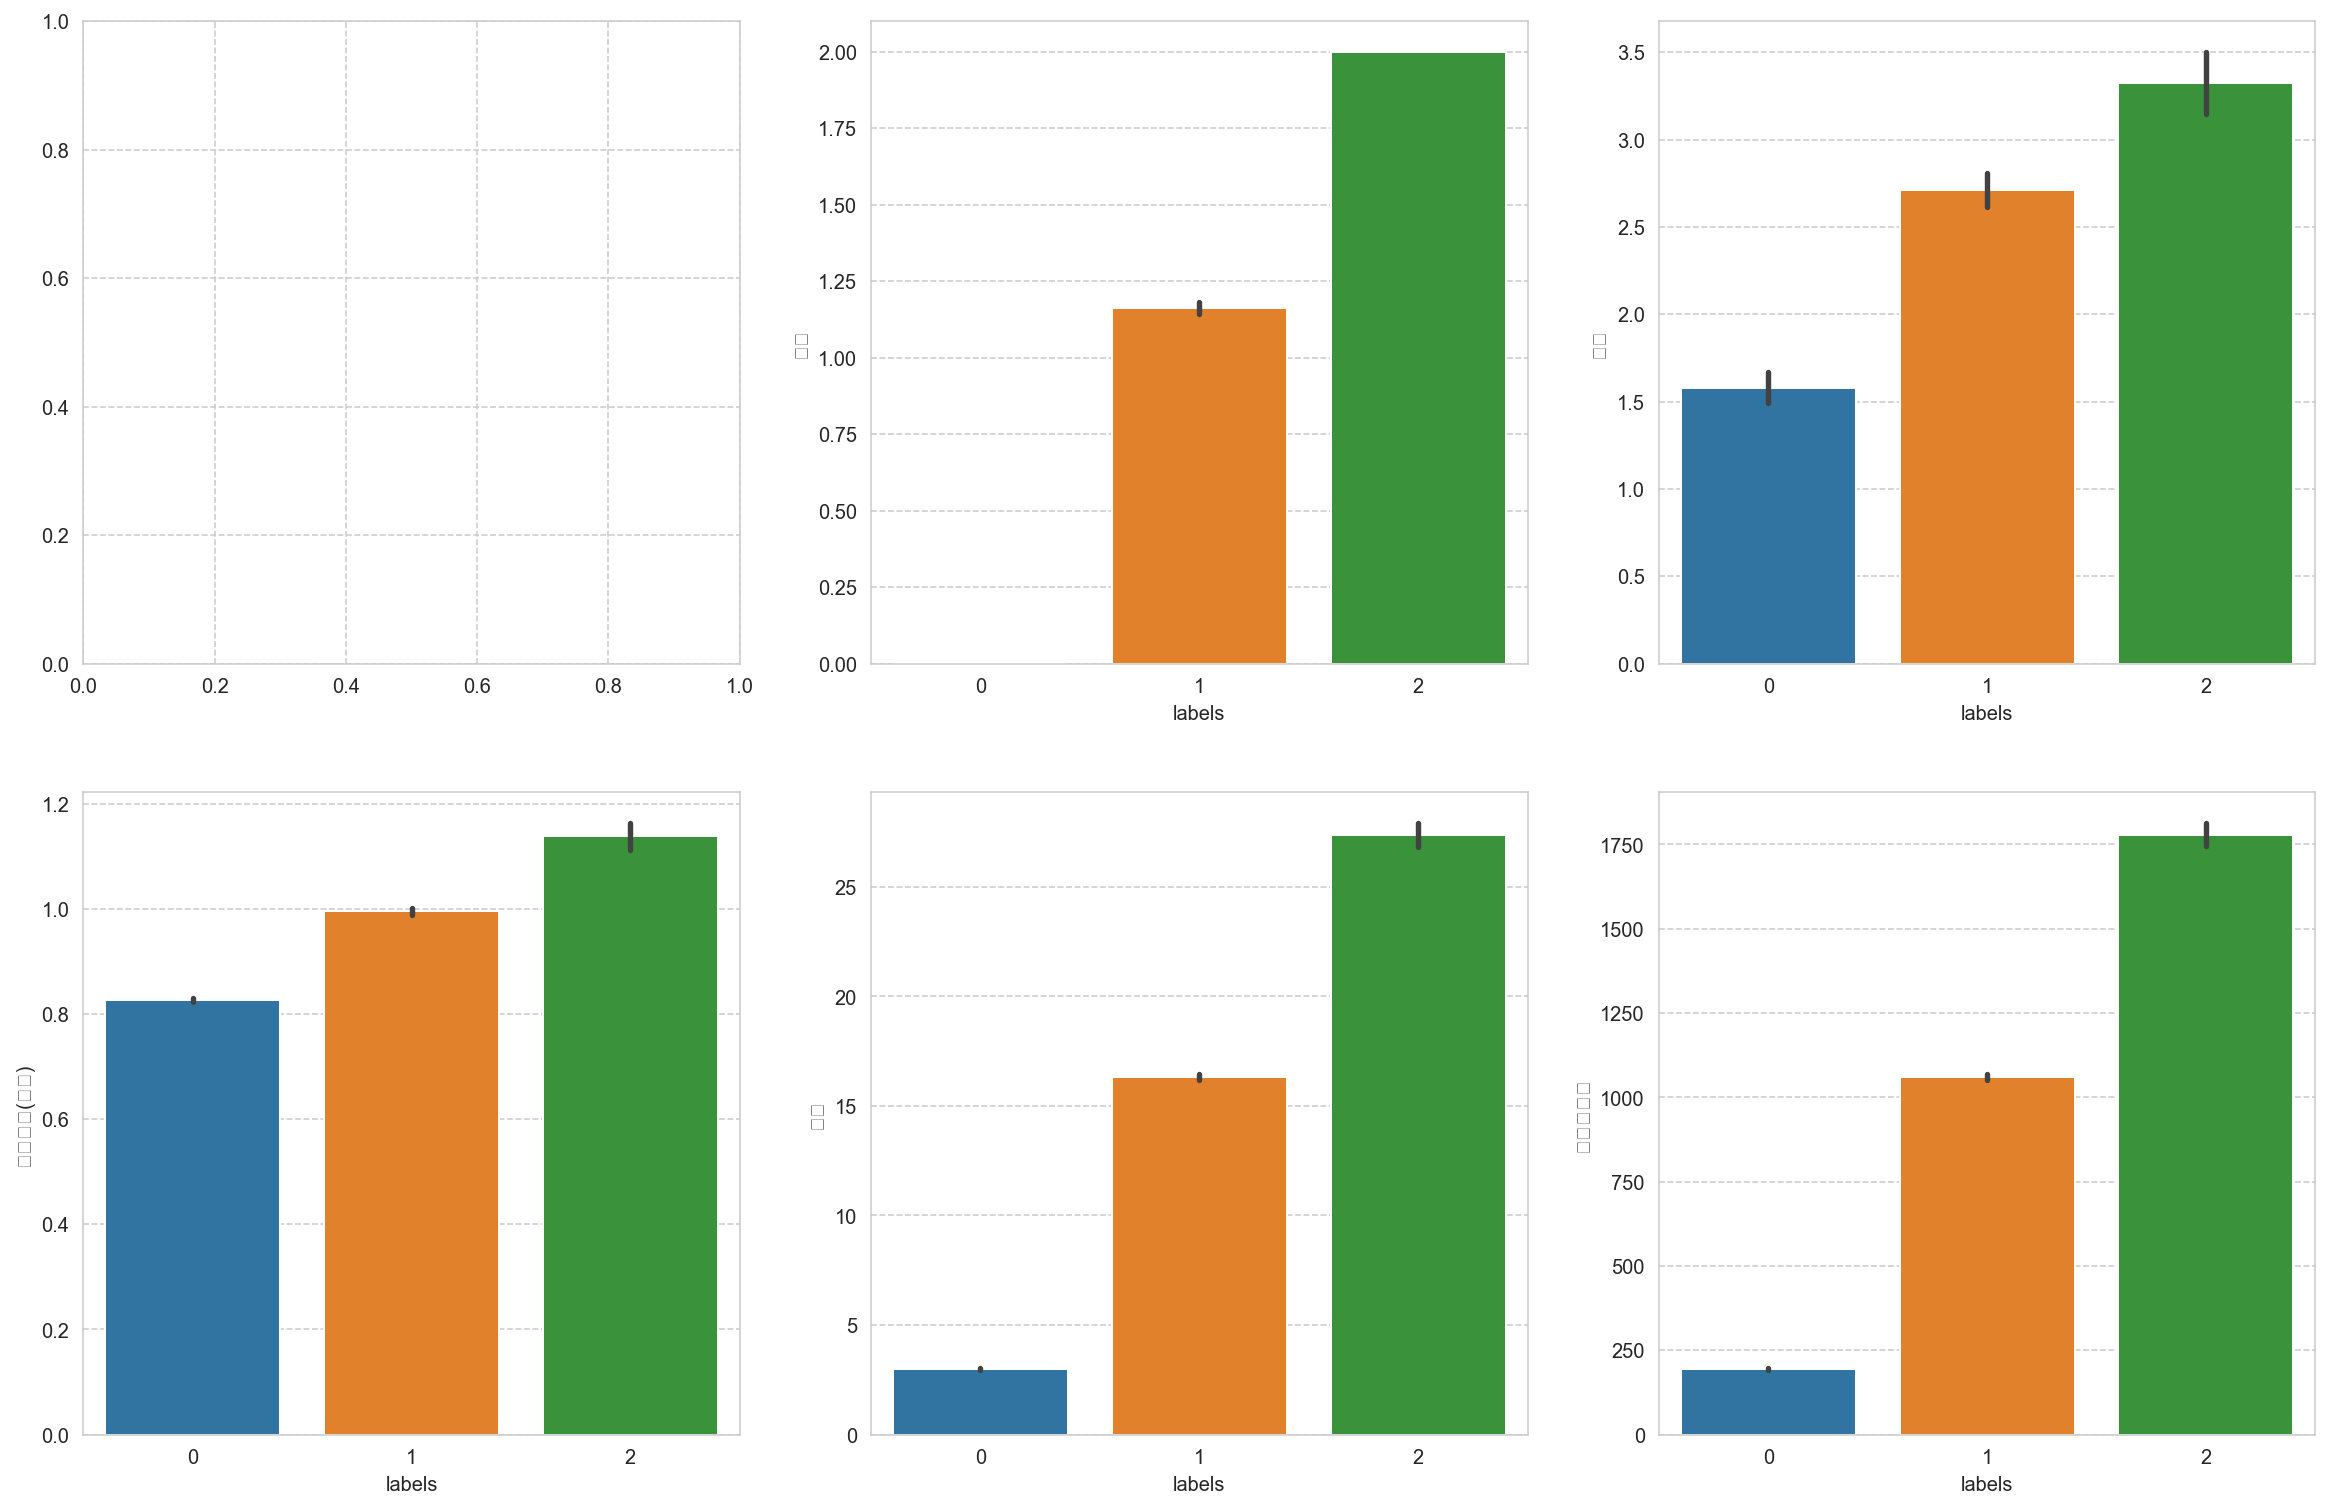

In [95]:
f, ax = plt.subplots(2,3,figsize=(20,13))

for i in range(1,6):
        sns.barplot(x='labels', y=column[i], data=group, ax = ax[i//3, i%3])

# sns.barplot(x='labels', y='크기', data = group, ax = ax[0,0])
# sns.barplot(x='labels', y='나이', data = group, ax = ax[0,1])
# sns.barplot(x='labels', y='체중', data = group, ax = ax[1,0])

plt.show()

In [96]:
group1 = group.groupby('labels').mean().reset_index()
group1

,labels,크기,나이,산책시간(시간),체중,적정음수량
0,0,0.000000,1.578873,0.826621,2.988019,194.221257
1,1,1.161538,2.710769,0.995077,16.318115,1060.677500
2,2,2.000000,3.324121,1.138442,27.348467,1777.650377


In [97]:
group

,품종,크기,나이,산책시간(시간),체중,적정음수량,labels
0,골든 리트리버,2,13,0.5,27.0,1755.0,2
1,골든 리트리버,2,10,0.5,25.0,1625.0,2
2,골든 리트리버,2,9,0.5,40.0,2600.0,2
3,골든 리트리버,2,8,0.5,28.0,1820.0,2
4,골든 리트리버,2,8,0.5,33.0,2145.0,2
...,...,...,...,...,...,...,...
7820,프렌치불독,0,0,0.5,5.2,338.0,0
7821,핏불테리어,2,2,1.5,25.0,1625.0,2
7823,화이트테리어,0,5,1.5,5.0,325.0,0
7824,휘펫,1,2,1.0,14.0,910.0,1
